In [6]:
import pandas as pd
import numpy as np
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")



print(insurance.head())

   age     sex     bmi smoker     region      charges
0   19  female  27.900    yes  southwest  16884.92400
1   33    male  22.705     no  northwest  21984.47061
2   32    male  28.880     no  northwest   3866.85520
3   31  female  25.740     no  southeast   3756.62160
4   60  female  25.840     no  northwest  28923.13692


In [7]:
dummies = pd.get_dummies(insurance[['region']], prefix='region')
print(dummies.head())

   region_northeast  region_northwest  region_southeast  region_southwest
0             False             False             False              True
1             False              True             False             False
2             False              True             False             False
3             False             False              True             False
4             False              True             False             False


/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


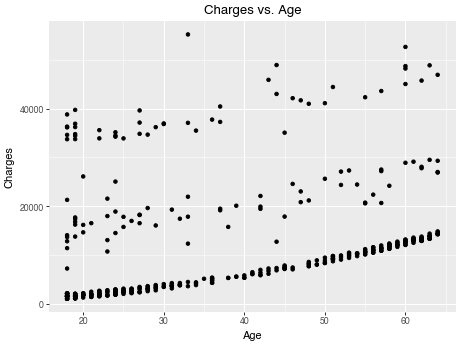

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


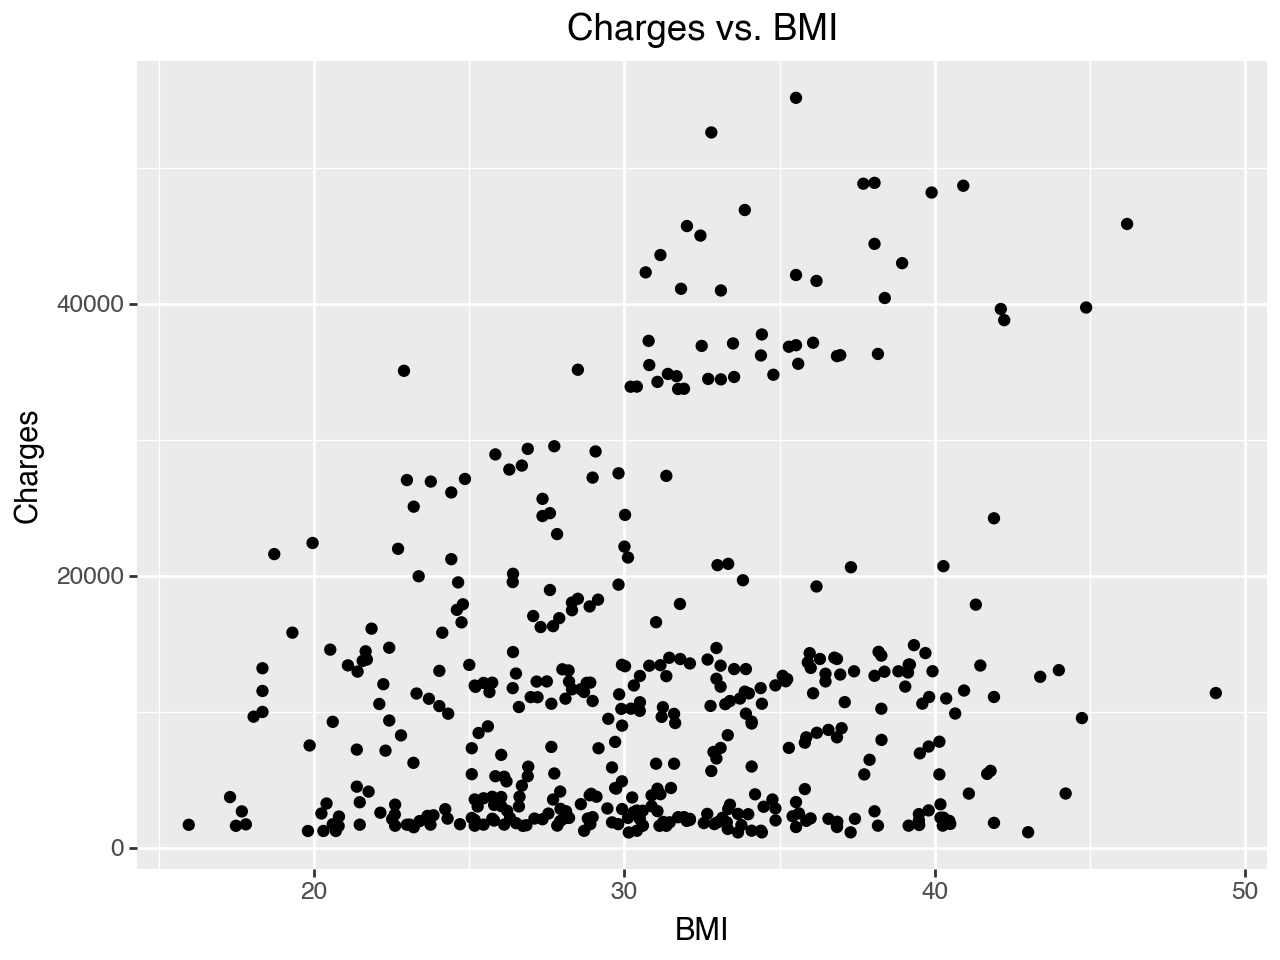

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


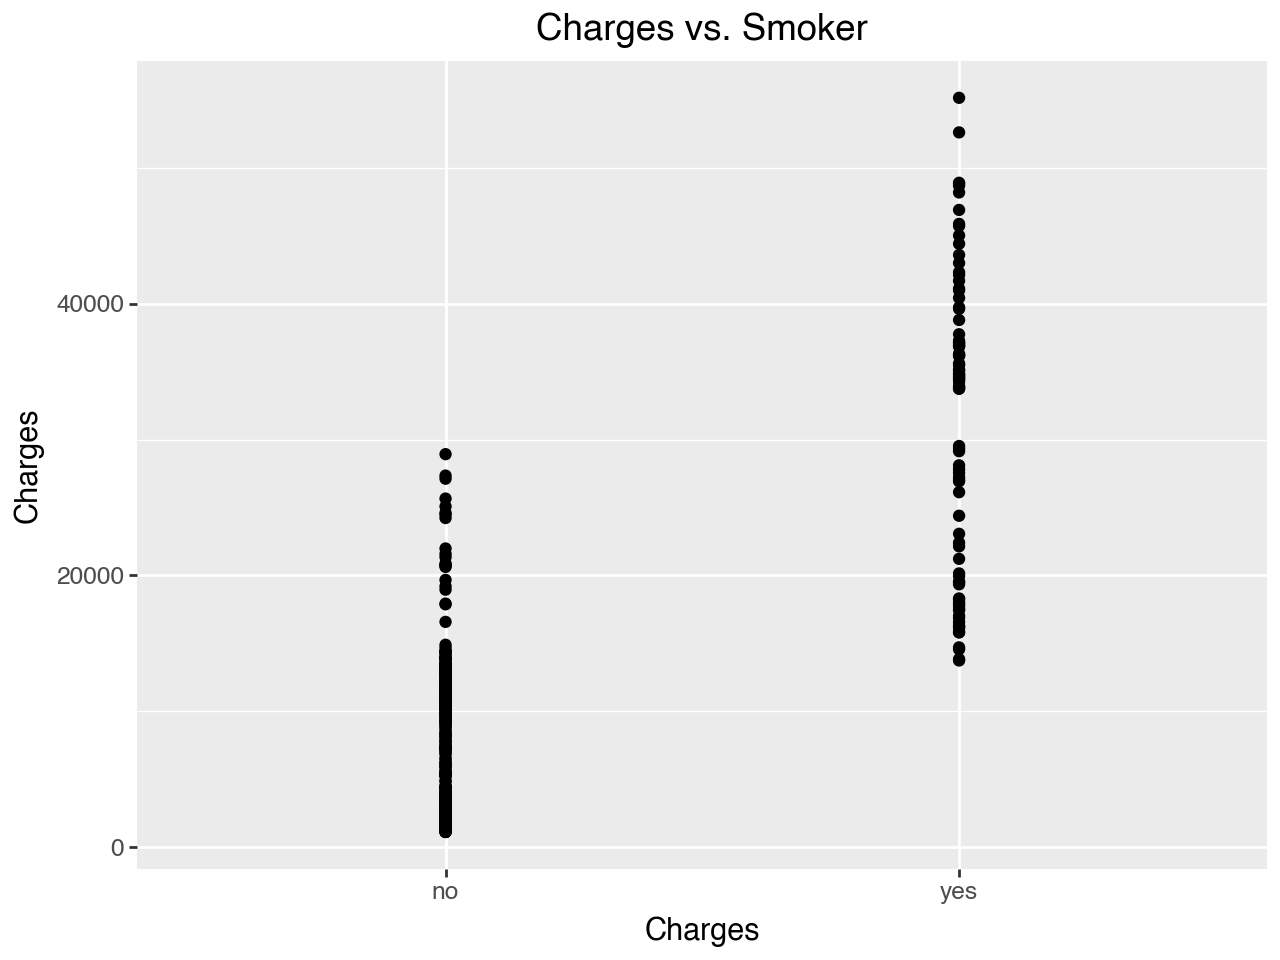

(<Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>,
 <Figure Size: (640 x 480)>)

In [8]:
from plotnine import ggplot, aes, geom_point, labs

scatter_plot1 = (ggplot(insurance, aes(x='age', y='charges')) +
                 geom_point() +
                 labs(title='Charges vs. Age', x='Age', y='Charges'))

scatter_plot2 = (ggplot(insurance, aes(x='bmi', y='charges')) +
                 geom_point() +
                 labs(title='Charges vs. BMI', x='BMI', y='Charges'))

# Simple Scatter Plot 3: Log Charges vs. Charges
scatter_plot3 = (ggplot(insurance, aes(x='smoker', y='charges')) +
                 geom_point() +
                 labs(title='Charges vs. Smoker', x='Charges', y='Charges'))

scatter_plot1, scatter_plot2, scatter_plot3


Charges vs Age: The scatter plot of charges versus age shows an upward trend, indicating that insurance costs generally increase as age rises. There are distinct clusters, suggesting the influence of additional factors like smoking status.


Charges vs BMI: The plot comparing charges to BMI reveals a more scattered distribution, suggesting a weaker and less clear relationship. While higher BMI values seem to associate with slightly higher charges, the overall pattern is not as pronounced.


Charges vs Smoker/Non Smoker: In the scatter plot of charges versus smoker status, two distinct clusters are evident, highlighting that smokers have substantially higher insurance costs compared to non-smokers. This suggests that smoking is a strong predictor of higher insurance expenses.

In [9]:
from re import X
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


x = insurance[['age']]  
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(x_train, y_train)

y_train_preds = lr_fit.predict(x_train)
y_test_preds = lr_fit.predict(x_test)

coefficient = lr_fit.coef_[0]
intercept = lr_fit.intercept_


mse_test = mean_squared_error(y_test, y_test_preds)

r2_test = r2_score(y_test, y_test_preds)


print("Test MSE: " + str(mse_test))
print("Test R^2: " + str(r2_test))

print("Coefficient Age: " + str(coefficient))
print("Intercept Age: " + str(intercept))

Test MSE: 107604188.10932656
Test R^2: 0.13589652334403535
Coefficient Age: 214.5634511606669
Intercept Age: 4584.344201758463


The model shows that age has a small positive effect on insurance charges, with charges increasing by about 243.74 units per year of age. However, the low R^2 (7.2%) and high MSE indicate that age alone is not a strong predictor of charges for this data.

Make a model that also incorporates the variable sex. Report your results.

In [10]:
insurance = pd.get_dummies(insurance, columns=['sex'], drop_first=True)
print(insurance.head())

   age     bmi smoker     region      charges  sex_male
0   19  27.900    yes  southwest  16884.92400     False
1   33  22.705     no  northwest  21984.47061      True
2   32  28.880     no  northwest   3866.85520      True
3   31  25.740     no  southeast   3756.62160     False
4   60  25.840     no  northwest  28923.13692     False


In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = insurance[['age', 'sex_male']]
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_train_preds = lr.predict(x_train)
y_test_preds = lr.predict(x_test)


coefficients = lr.coef_
intercept = lr.intercept_

test_mse = mean_squared_error(y_test, y_test_preds)
test_r2 = r2_score(y_test, y_test_preds)


print("Coefficient for Age: " + str(coefficients[0]))
print("Coefficient for Sex (Male): " + str(coefficients[1]))
print("Intercept: " + str(intercept))
print("Test MSE: " + str(test_mse))
print("Test R^2: " + str(test_r2))


Coefficient for Age: 209.29665277833033
Coefficient for Sex (Male): 1473.5260436259239
Intercept: 3755.226264005276
Test MSE: 123710493.45774047
Test R^2: 0.1252114734047708


The model shows that age has a positive effect on insurance charges, with charges increasing by about 209.30 units per year of age. Additionally, being male is associated with an increase in charges of approximately 1,473.53. However, the Test R^2  of 12.5% and Test MSE suggest that these variables explain only a small portion of the variation in insurance charges.

Now make a model that does not include sex, but does include smoker. Report your results.

In [12]:
print(insurance.head())

   age     bmi smoker     region      charges  sex_male
0   19  27.900    yes  southwest  16884.92400     False
1   33  22.705     no  northwest  21984.47061      True
2   32  28.880     no  northwest   3866.85520      True
3   31  25.740     no  southeast   3756.62160     False
4   60  25.840     no  northwest  28923.13692     False


In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

insurance = pd.get_dummies(insurance, columns=['smoker'], drop_first=True)


x = insurance[['age', 'smoker_yes']]
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

coefficients = lr.coef_
intercept = lr.intercept_

test_mse = mean_squared_error(y_test, lr.predict(x_test))
test_r2 = r2_score(y_test, lr.predict(x_test))

print("Coefficient for Age: " + str(coefficients[0]))
print("Coefficient for Smoker (Yes): " + str(coefficients[1]))
print("Intercept: " + str(intercept))
print("Test MSE: " + str(test_mse))
print("Test R^2: " + str(test_r2))


Coefficient for Age: 247.9686414297061
Coefficient for Smoker (Yes): 23783.237823558204
Intercept: -1924.8183280556204
Test MSE: 27352787.784298655
Test R^2: 0.8065814446672434


The model shows that age has a modest positive effect on insurance charges, increasing by about 247.97 units per year. Being a smoker, however, significantly raises charges by approximately 23,783.24 units. The high Test  R^2 of 80.7% indicates that the model explains a large portion of the variation in insurance charges.

The smoker-based model (Q3) has a better fit for the data. We can see this from the much lower MSE and much higher R^2. Both these indicate that Q3 better predicts the data than Q2.

In [29]:
x = insurance[['age', 'bmi']]
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

coefficients = lr.coef_
intercept = lr.intercept_

test_mse = mean_squared_error(y_test, lr.predict(x_test))
test_r2 = r2_score(y_test, lr.predict(x_test))

print("Coefficient for Age: " + str(coefficients[0]))
print("Coefficient for BMI: " + str(coefficients[1]))
print("Intercept: " + str(intercept))
print("Test MSE: " + str(test_mse))
print("Test R^2: " + str(test_r2))


Coefficient for Age: 199.60006815397585
Coefficient for BMI: 270.53353676488547
Intercept: -3468.719830867887
Test MSE: 117716955.13097996
Test R^2: 0.16759331519857057


The Age and BMI model has a Test MSE of 117,716,955.13 and a Test R^2 of 16.8%, showing a slight improvement over the Sex-based model, which had a Test MSE of 123,710,493.46 and a Test R^2of 12.5%. However, it still falls short compared to the Smoker-based model, which achieved a much lower Test MSE of 27,352,787.78 and a significantly higher R^2 of 80.7%. This indicates that including BMI as a predictor offers limited benefits, while smoking status remains a much stronger factor in predicting insurance charges.

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

insurance['age^2'] = insurance['age']**2

x = insurance[['age', 'age^2']]
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

coefficients = lr.coef_
intercept = lr.intercept_

test_mse = mean_squared_error(y_test, lr.predict(x_test))
test_r2 = r2_score(y_test, lr.predict(x_test))

print("Coefficient for Age: " + str(coefficients[0]))
print("Coefficient for Age^2: " + str(coefficients[1]))
print("Intercept: " + str(intercept))
print("Test MSE: " + str(test_mse))
print("Test R^2: " + str(test_r2))


Coefficient for Age: 282.25740313699123
Coefficient for Age^2: -0.8849271174527609
Intercept: 3223.3879479114585
Test MSE: 121747479.23006293
Test R^2: 0.1390924488654508


The Age and Age^2 model has a higher Test MSE (121,747,479.23 compared to 99,175,781.61) but a slightly better R² (0.139 vs. 0.072). This means that while the quadratic model explains more variation in the data, it does so at the cost of increased prediction error. Thus, the Age and Age^2 model captures the relationship between age and charges more effectively in terms of explanatory power but is less precise in terms of prediction accuracy.

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

insurance['age^2'] = insurance['age']**2
insurance['age^3'] = insurance['age']**3
insurance['age^4'] = insurance['age']**4

x = insurance[['age', 'age^2', 'age^3', 'age^4']]
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

test_mse = mean_squared_error(y_test, lr.predict(x_test))
test_r2 = r2_score(y_test, lr.predict(x_test))

print("Test MSE: " + str(test_mse))
print("Test R²: " + str(test_r2))


Test MSE: 119880218.40966608
Test R²: 0.15229632750329603


The degree 4 polynomial model has a higher Test MSE (119,880,218.41 compared to 99,175,781.61) but a better R² (0.152 compared to 0.072). This means the polynomial model explains more of the variation in insurance charges (15.2% vs. 7.2%) but at the cost of increased prediction error. While the polynomial model captures more complexity, it may overfit the data, resulting in reduced predictive precision.

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#ChatGPT - Create polynomial features up to degree 12
for i in range(2, 13):
    insurance[f'age^{i}'] = insurance['age']**i

x = insurance[['age'] + [f'age^{i}' for i in range(2, 13)]]
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

test_mse = mean_squared_error(y_test, lr.predict(x_test))
test_r2 = r2_score(y_test, lr.predict(x_test))

print("Test MSE: " + str(test_mse))
print("Test R²: " + str(test_r2))


Test MSE: 122080918.8172285
Test R²: 0.13673461229870287


The degree 12 polynomial model has a higher Test MSE (122,080,918.82 compared to 99,175,781.61) but a better R² (0.137 compared to 0.072). While the model explains more of the variation in charges (13.7% vs. 7.2%), the increase in prediction error suggests overfitting. 

According to MSE and R^2, The simple linear model using only age (Part Two Q1) has the lowest Test MSE (99,175,781.61) and an R^2 of 0.072, indicating it has the least prediction error. However, the models with polynomial terms have higher R^2 values but also come with significantly higher Test MSE values, suggesting that these models explain more variance but at the cost of accuracy and possible overfitting.

/Users/evaneldridge/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
/var/folders/jb/g1z659_j7g7g3c677k1x2bsc0000gn/T/ipykernel_73173/2122795221.py:21: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


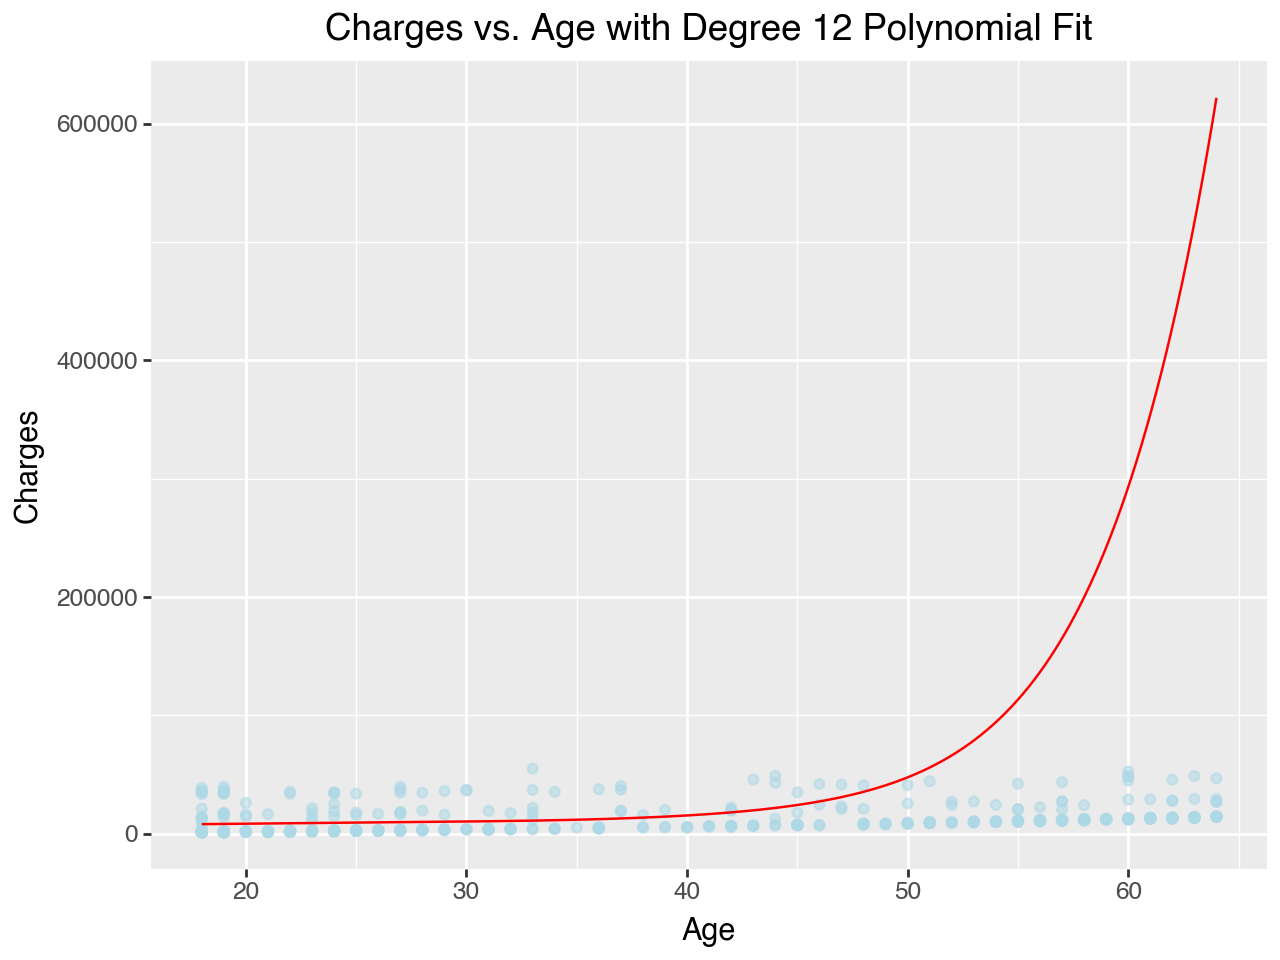

In [37]:
from plotnine import ggplot, aes, geom_point, geom_line, labs
import pandas as pd
import numpy as np

#ChatGPT - # Generate age values for predictions and create polynomial features
age_values = np.linspace(insurance['age'].min(), insurance['age'].max(), 1000)
age_poly_features = np.hstack([age_values.reshape(-1, 1)**i for i in range(1, 13)])
predictions = lr.predict(age_poly_features)

prediction_df = pd.DataFrame({'age': age_values, 'charges': predictions})

scatter_plot_with_line = (ggplot(insurance, aes(x='age', y='charges')) +
                          geom_point(alpha=0.5, color='lightblue') +
                          geom_line(prediction_df, aes(x='age', y='charges'), color='red') +
                          labs(title='Charges vs. Age with Degree 12 Polynomial Fit',
                               x='Age', y='Charges'))

# Display the plot
print(scatter_plot_with_line)


In [3]:
import pandas as pd
import numpy as np
insurance2 = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")


print(insurance2.head())

   age     sex     bmi smoker     region      charges
0   23    male  34.400     no  southwest   1826.84300
1   56    male  40.300     no  southwest  10602.38500
2   18    male  34.100     no  southeast   1137.01100
3   63  female  23.085     no  northeast  14451.83515
4   63    male  28.310     no  northwest  13770.09790


In [4]:
insurance2 = pd.get_dummies(insurance2, columns=['sex', 'smoker'], drop_first=True)

print(insurance2.head())


   age     bmi     region      charges  sex_male  smoker_yes
0   23  34.400  southwest   1826.84300      True       False
1   56  40.300  southwest  10602.38500      True       False
2   18  34.100  southeast   1137.01100      True       False
3   63  23.085  northeast  14451.83515     False       False
4   63  28.310  northwest  13770.09790      True       False


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:
#Only age as predictor
x_train = insurance[['age']]
y_train = insurance['charges']
model_1 = LinearRegression().fit(x_train, y_train)

x_test = insurance2[['age']]
y_test = insurance2['charges']
y_preds = model_1.predict(x_test)

mse_model_1 = mean_squared_error(y_test, y_preds)
print("MSE for Model 1 (Only Age):", mse_model_1)


MSE for Model 1 (Only Age): 136077136.50195494


In [19]:
#Age and BMI
x_train = insurance[['age', 'bmi']]
y_train = insurance['charges']
model_2 = LinearRegression().fit(x_train, y_train)

x_test = insurance2[['age', 'bmi']]
y_test = insurance2['charges']
y_preds = model_2.predict(x_test)

mse_model_2 = mean_squared_error(y_test, y_preds)
print("MSE for Model 2 (Age and BMI):", mse_model_2)


MSE for Model 2 (Age and BMI): 132636406.1108129


In [20]:
#Age, BMI and Smoker (No Interactions)
x_train = insurance[['age', 'bmi', 'smoker_yes']]
y_train = insurance['charges']
model_3 = LinearRegression().fit(x_train, y_train)

# Predict on the new data
x_test = insurance2[['age', 'bmi', 'smoker_yes']]
y_test = insurance2['charges']
y_preds = model_3.predict(x_test)

# Calculate MSE
mse_model_3 = mean_squared_error(y_test, y_preds)
print("MSE for Model 3 (Age, BMI, and Smoker):", mse_model_3)


MSE for Model 3 (Age, BMI, and Smoker): 35377541.24141632


In [21]:
#Age and BMI, with Interaction Terms with Smoker

insurance['age_smoker'] = insurance['age'] * insurance['smoker_yes']
insurance['bmi_smoker'] = insurance['bmi'] * insurance['smoker_yes']
insurance2['age_smoker'] = insurance2['age'] * insurance2['smoker_yes']
insurance2['bmi_smoker'] = insurance2['bmi'] * insurance2['smoker_yes']

x_train = insurance[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y_train = insurance['charges']
model_4 = LinearRegression().fit(x_train, y_train)

x_test = insurance2[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y_test = insurance2['charges']
y_preds = model_4.predict(x_test)

mse_model_4 = mean_squared_error(y_test, y_preds)
print("MSE for Model 4 (Interaction Terms):", mse_model_4)


MSE for Model 4 (Interaction Terms): 24795908.412643366


In [22]:
#Age, BMI, and Smoker with Full Interaction Terms

x_train = insurance[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']]
y_train = insurance['charges']
model_5 = LinearRegression().fit(x_train, y_train)

x_test = insurance2[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']]
y_test = insurance2['charges']
y_preds = model_5.predict(x_test)

mse_model_5 = mean_squared_error(y_test, y_preds)
print("MSE for Model 5 (Full Interaction Model):", mse_model_5)


MSE for Model 5 (Full Interaction Model): 21786256.866852593


The Full Interaction Model (Model 5) performs the best, with the lowest MSE of 21,786,256.87. 

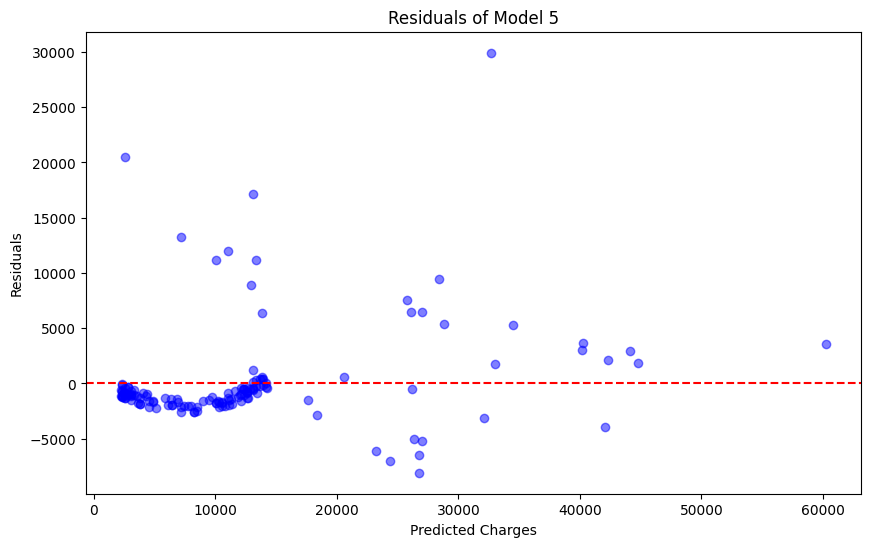

In [24]:
import matplotlib.pyplot as plt

y_preds_model_5 = model_5.predict(x_test)
residuals = y_test - y_preds_model_5

plt.figure(figsize=(10, 6))
plt.scatter(y_preds_model_5, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals of Model 5')
plt.show()


In [29]:
import pandas as pd
import itertools
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def summarize_model(traindata, testdata, xvariables, yvariable, polynomialdegree=1, interaction_only=False):
    X_train = traindata[xvariables]
    y_train = traindata[yvariable]
    X_test = testdata[xvariables]
    y_test = testdata[yvariable]

    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=polynomialdegree, include_bias=False, interaction_only=interaction_only)),
        ('linear_regression', LinearRegression())
    ])
    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)

    return mse_test

def find_best_model(traindata, testdata, predictors, yvariable):
    best_mse = float("inf")
    best_degree = None
    best_vars = None
    best_interaction_only = None

    for r in range(1, len(predictors) + 1):
        #ChatGPT - Loop through polynomial degrees
        for xvars in itertools.combinations(predictors, r):
            for degree in range(1, 4):  # Limiting to degree 1 to 3 for practicality
                # Test both with and without interaction-only terms
                for interaction_only in [True, False]:
                    mse_test = summarize_model(
                        traindata, testdata, list(xvars), yvariable,
                        polynomialdegree=degree, interaction_only=interaction_only)
                
                    # Update if this model has a lower test MSE
                    if mse_test < best_mse:
                        best_mse = mse_test
                        best_degree = degree
                        best_vars = xvars
                        best_interaction_only = interaction_only

    print(f"\nBest Model Summary:")
    print(f"Predictors: {', '.join(best_vars)}, Degree: {best_degree}, Interaction Only: {best_interaction_only}")
    print(f"Best Test MSE: {best_mse}")

predictors = ["age", "bmi", "sex_male", "smoker_yes"]
find_best_model(insurance, insurance2, predictors, "charges")



Best Model Summary:
Predictors: age, bmi, sex_male, smoker_yes, Degree: 3, Interaction Only: True
Best Test MSE: 21363651.208847005


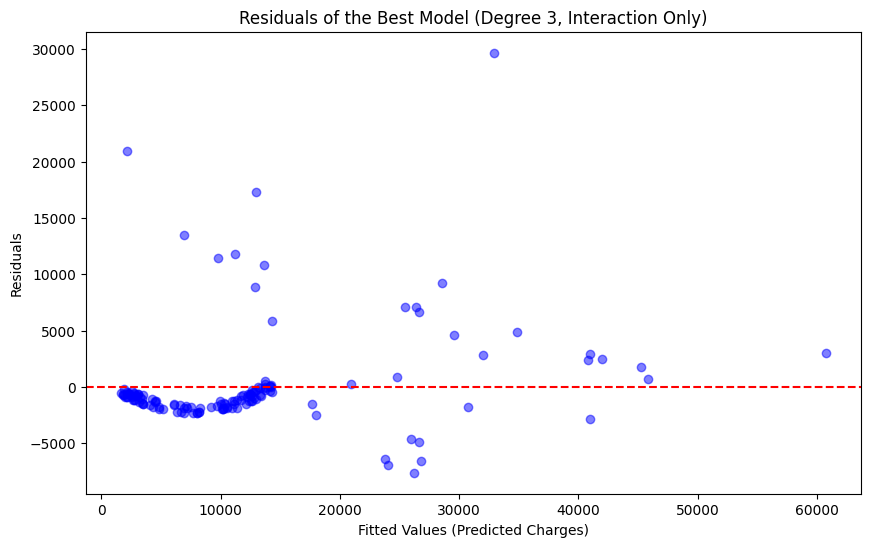

In [30]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train = insurance[['age', 'bmi', 'sex_male', 'smoker_yes']]
y_train = insurance['charges']
X_test = insurance2[['age', 'bmi', 'sex_male', 'smoker_yes']]
y_test = insurance2['charges']

best_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)),
    ('linear_regression', LinearRegression())
])
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted Charges)')
plt.ylabel('Residuals')
plt.title('Residuals of the Best Model (Degree 3, Interaction Only)')
plt.show()
